In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import RandomForestRegressor
import autopep8

In [2]:
autopep8.add_toolbar_button

AttributeError: module 'autopep8' has no attribute 'add_toolbar_button'

In [3]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True  

In [4]:
#alpha=input(str("input the file path"))
#data_raw_filepath=alpha

data=pd.read_csv(r'C:\Users\ojas2\OneDrive\Desktop\TUF\b.tech\ARAI_AI-ML\Results-100-Augmentation-III-Runs.csv', encoding='ISO-8859-1')
data.head(5)

,Time (s),Displacement (mm),Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,...,Run 91,Run 92,Run 93,Run 94,Run 95,Run 96,Run 97,Run 98,Run 99,Run 100
0,0.0000,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00
1,0.0001,0.1,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00
2,0.0002,0.2,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00
3,0.0003,0.3,0.0,0.00,0.0,7890.77,0.0,7666.53,8301.51,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.00,7915.26,0.00,8186.68
4,0.0004,0.4,0.0,7598.57,0.0,0.00,0.0,0.00,22.01,0.0,...,8389.28,0.0,0.0,0.0,8491.78,0.0,8429.71,0.00,8360.76,105.21


In [5]:
output_file=pd.read_excel(r'C:\Users\ojas2\OneDrive\Desktop\TUF\b.tech\ARAI_AI-ML\Input-100-Augmentation-III-Runs.xlsx')
output_file.head(5)

,Run,TFB,MFB,TRB,MRB,TBM,MBM,TBB,MBB,TBS,MBS,TBR,MBR
0,Run 1,6.354205,500,6.114485,500,7.074405,500,2.6,310,6.5,410,7.123415,500
1,Run 2,6.603025,500,7.102355,500,7.032155,500,2.6,310,6.5,410,7.146555,500
2,Run 3,5.916105,500,5.944575,500,6.815315,500,2.6,310,6.5,410,6.932575,500
3,Run 4,7.076875,500,6.775795,500,5.874115,500,2.6,310,6.5,410,5.903235,500
4,Run 5,6.110455,500,6.104475,500,7.042165,500,2.6,310,6.5,410,6.269965,500


In [6]:

def get_column_names():
    #data = pd.read_csv(r'C:\Users\ojas2\OneDrive\Desktop\TUF\b.tech\ARAI_AI-ML\Results-54-Baseline-Runs.csv', encoding='ISO-8859-1')
    column_names = data.columns.tolist()
    return column_names

column_names_array = get_column_names()
print(column_names_array)
print(type(column_names_array))
col_n = column_names_array[2:]
print(type(col_n))

['Time (s)', 'Displacement (mm)', 'Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5', 'Run 6', 'Run 7', 'Run 8', 'Run 9', 'Run 10', 'Run 11', 'Run 12', 'Run 13', 'Run 14', 'Run 15', 'Run 16', 'Run 17', 'Run 18', 'Run 19', 'Run 20', 'Run 21', 'Run 22', 'Run 23', 'Run 24', 'Run 25', 'Run 26', 'Run 27', 'Run 28', 'Run 29', 'Run 30', 'Run 31', 'Run 32', 'Run 33', 'Run 34', 'Run 35', 'Run 36', 'Run 37', 'Run 38', 'Run 39', 'Run 40', 'Run 41', 'Run 42', 'Run 43', 'Run 44', 'Run 45', 'Run 46', 'Run 47', 'Run 48', 'Run 49', 'Run 50', 'Run 51', 'Run 52', 'Run 53', 'Run 54', 'Run 55', 'Run 56', 'Run 57', 'Run 58', 'Run 59', 'Run 60', 'Run 61', 'Run 62', 'Run 63', 'Run 64', 'Run 65', 'Run 66', 'Run 67', 'Run 68', 'Run 69', 'Run 70', 'Run 71', 'Run 72', 'Run 73', 'Run 74', 'Run 75', 'Run 76', 'Run 77', 'Run 78', 'Run 79', 'Run 80', 'Run 81', 'Run 82', 'Run 83', 'Run 84', 'Run 85', 'Run 86', 'Run 87', 'Run 88', 'Run 89', 'Run 90', 'Run 91', 'Run 92', 'Run 93', 'Run 94', 'Run 95', 'Run 96', 'Run 97', 'Run 

In [7]:
def get_colnames(colx):
    for index, row in data.iterrows():
        if row[colx] >= threshold:
            index_of_threshold = index
            updated_index = index_of_threshold * 0.1
            displacement.append(updated_index)
            break

In [8]:
threshold = 80000
index_of_threshold = 'Displacement (mm)'
displacement = []
i = 0
while i < len(col_n):
    get_colnames(col_n[i])
    i += 1
print(displacement)
print(len(displacement))

[73.3, 70.4, 78.4, 78.30000000000001, 77.2, 76.4, 77.0, 79.9, 78.9, 70.3, 80.2, 76.4, 67.60000000000001, 80.4, 77.30000000000001, 72.7, 75.9, 76.4, 77.80000000000001, 89.10000000000001, 76.9, 73.3, 78.10000000000001, 76.4, 76.4, 77.80000000000001, 75.60000000000001, 71.4, 72.10000000000001, 75.9, 76.5, 76.60000000000001, 67.10000000000001, 77.4, 71.2, 72.2, 87.9, 77.0, 73.60000000000001, 72.7, 79.7, 77.2, 76.2, 81.0, 80.10000000000001, 76.5, 83.80000000000001, 81.30000000000001, 75.60000000000001, 75.8, 72.8, 76.0, 85.30000000000001, 76.2, 83.9, 72.10000000000001, 76.60000000000001, 72.9, 79.5, 79.10000000000001, 75.0, 73.10000000000001, 75.7, 87.4, 81.80000000000001, 75.3, 79.4, 76.3, 76.2, 76.10000000000001, 75.4, 76.80000000000001, 74.60000000000001, 76.2, 73.8, 76.5, 76.9, 73.4, 72.9, 78.2, 80.2, 73.8, 84.0, 75.7, 76.4, 77.9, 73.7, 75.0, 78.9, 81.9, 80.4, 78.9, 84.2, 77.0, 73.5, 76.2, 75.8, 75.0, 79.4, 74.10000000000001]
100


In [ ]:
output_file["Displacement"] = displacement

In [ ]:
output_file.tail(5)

,Run,TFB,MFB,TRB,MRB,TBM,MBM,TBB,MBB,TBS,MBS,TBR,MBR,Displacement
95,Run 96,6.492915,500,6.555835,500,7.072715,500,2.6,310,6.5,410,6.117605,500,76.2
96,Run 97,6.851195,500,5.873335,500,6.497075,500,2.6,310,6.5,410,6.569745,500,75.8
97,Run 98,7.068945,500,5.984095,500,7.111065,500,2.6,310,6.5,410,5.919485,500,75.0
98,Run 99,6.797245,500,6.305585,500,5.859425,500,2.6,310,6.5,410,6.143475,500,79.4
99,Run 100,6.976775,500,6.710925,500,6.568055,500,2.6,310,6.5,410,6.514625,500,74.1


In [3]:
#df=output_file
df=pd.read_excel(r'C:\Users\ojas2\OneDrive\Desktop\TUF\b.tech\ARAI_AI-ML\normalized_data_copy.xlsx')

In [4]:
X = df[["TFB", "TRB", "TBM", "TBR"]].values
y =  df[["result"]].values

In [5]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
num_features = X_train.shape[1]
print(num_features)

4


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape=(num_features,)),
    #tf.keras.layers.Dense(8192, activation = 'relu'),
    #tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'elu')
    ])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
#rmse=tf.sqrt(mse)
model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])

In [8]:
history=model.fit(X_train, y_train, epochs=50, batch_size=3, verbose=1)

Epoch 1/50
25/25 [==============================] - 2s 5ms/step - loss: 0.9298 - accuracy: 0.0000e+00
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4281 - accuracy: 0.0000e+00
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3521 - accuracy: 0.0000e+00
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.0000e+00
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2443 - accuracy: 0.0000e+00
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2451 - accuracy: 0.0000e+00
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2327 - accuracy: 0.0000e+00
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1996 - accuracy: 0.0000e+00
Epoch 9/50
25/25 [==============================] - 0s 7ms/step - loss: 0.2170 - accuracy: 0.0000e+00
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2334 - 

In [ ]:
model_AMSgrad = tf.keras.Sequential([
    tf.keras.layers.Dense(16384, activation = 'relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(8192, activation = 'relu'),
    #tf.keras.layers.Dense(4096, activation = 'relu'),
    #tf.keras.layers.Dense(2048, activation = 'relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    #tf.keras.layers.Dense(64, activation = 'relu'),
    #tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1)
    ])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer = tf.keras.optimizers.Adam, loss='mse')

In [ ]:
history_2=model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

In [9]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [10]:
print(y_pred)

[[ 0.25022268]
 [ 0.20098852]
 [ 0.66267985]
 [-0.99953777]
 [ 1.0153636 ]
 [ 0.18947028]
 [ 0.20098852]
 [ 0.20098852]
 [ 0.20098852]
 [-0.95465875]
 [ 0.4054327 ]
 [ 0.20098852]
 [ 0.6648016 ]
 [-0.3478334 ]
 [-0.38221562]
 [ 0.20098852]
 [ 0.20098852]
 [-0.61057574]
 [-0.8909712 ]
 [-0.9316675 ]
 [ 1.7401954 ]
 [-0.99953777]
 [-0.9995294 ]
 [ 1.0891832 ]
 [ 0.20098852]
 [ 0.33713797]
 [ 0.0217739 ]
 [ 0.6648016 ]
 [ 0.20098852]
 [ 0.33713797]
 [ 1.8713747 ]
 [-0.9883311 ]
 [-0.33049744]]


In [11]:
y_pred_AMSgrad = model_AMSgrad.predict(X_test)

NameError: name 'model_AMSgrad' is not defined

In [12]:
print_y_pred_AMSgrad)

SyntaxError: unmatched ')' (2123961274.py, line 1)

In [13]:
print(y_test)

[[ 0.48116975]
 [ 0.12278125]
 [-0.08201218]
 [-1.25957441]
 [ 0.37877303]
 [ 0.42997139]
 [-0.13321054]
 [-0.49159904]
 [ 0.07158289]
 [-0.49159904]
 [ 0.32757468]
 [ 0.02038453]
 [ 1.81232705]
 [-0.79878919]
 [ 0.07158289]
 [ 0.12278125]
 [ 0.07158289]
 [-0.59399576]
 [-0.44040069]
 [-0.69639247]
 [ 2.37550898]
 [-1.36197112]
 [-1.31077277]
 [ 1.30034347]
 [ 0.32757468]
 [ 0.27637632]
 [ 0.58356646]
 [ 1.04435168]
 [ 0.27637632]
 [ 0.12278125]
 [ 2.11951719]
 [-1.41316948]
 [-0.1844089 ]]


In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'mse score'{mse},f'rmse'{score},f'R2 score'{r2})

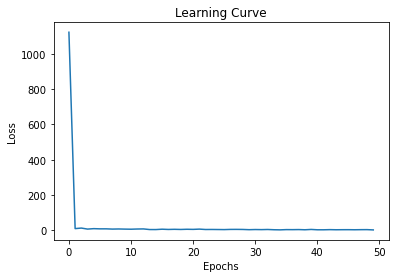

In [34]:
# Plot the learning curve
plt.plot(history.history['loss'])
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [107]:
column_names = list(X)
importances = np.abs(model.layers[0].weights[0].numpy()).sum(axis=1)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importance rankings
for i, index in enumerate(indices):
    print(f"{i+1}. Feature '{column_names[index]}' has importance {importances[index]}")

1. Feature '[ 8.02481785e-02  6.60668285e-01  5.81162939e-15  1.86091867e+00
  1.04322632e+00  1.12528134e+00  1.36421903e+00  6.96007388e-01
 -7.22233603e-01  7.57232532e-01  7.22233603e-01  6.21950532e-01]' has importance 283.22186279296875
2. Feature '[ 1.8457081   1.31887011  0.88272996  1.82220091  0.64198542  0.89297481
 -1.20372267  0.98880662 -1.92595627  1.30237056  0.88272996  1.62861214]' has importance 266.49237060546875
3. Feature '[ 1.92595627  0.50579727 -1.68521174  0.97041032  0.88272996  0.04118422
 -0.56173724  0.89564323  0.08024818  0.94372712  0.56173725  1.08656358]' has importance 264.62408447265625
4. Feature '[ 0.7222336   0.58323278 -0.56173725  0.38964401 -0.96297814  1.55117663
  1.44446721  0.66938928  0.56173725  0.92938138  1.8457081   1.7447654 ]' has importance 254.97601318359375
5. Feature '[1.04322632 0.11861973 1.92595627 0.69938604 1.20372267 1.47374112
 0.16049636 1.17513341 1.36421903 1.23064187 0.96297814 0.38964401]' has importance 249.04133605